In [2]:
import matplotlib.pyplot as plt
plt.rc('font', size=16)
plt.rcParams['figure.constrained_layout.use'] = False

In [3]:
import numpy as np
import pandas as pd

# create test data
m = 3
X_train = np.linspace(-1.0,1.0,num=m)
y_train = np.array([0,1,0])
X_train = X_train.reshape(-1,1)

# create test data extending dataset
X_test=np.linspace(-3,3,num=1000).reshape(-1,1)

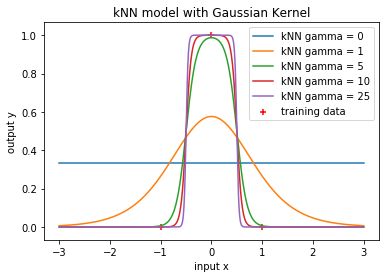

In [4]:
from sklearn.neighbors import KNeighborsRegressor

# iterate over gamma values and train different models
gammas = [0,1,5,10,25]
for gamma in gammas:
    def gaussian_kernel(distances):
        weights = np.exp(-gamma*(distances**2))
        return weights/np.sum(weights)

    model_i = KNeighborsRegressor(n_neighbors=m,weights=gaussian_kernel).fit(X_train, y_train)
    y_pred_i = model_i.predict(X_test)
    label = "kNN gamma = " + str(gamma)
    plt.plot(X_test, y_pred_i, label=label)
    plt.xlabel("input x"); plt.ylabel("output y")
plt.scatter(X_train, y_train, color="red", marker="+", label="training data")  
plt.title("kNN model with Gaussian Kernel")
plt.legend()
plt.show()

Parameter values when Kernel Ridge c= 0.1 gamma=0
[-0.00769231  0.09230769 -0.00769231]
Parameter values when Kernel Ridge c= 1 gamma=0
[-0.25  0.75 -0.25]
Parameter values when Kernel Ridge c= 1000 gamma=0
[-333.22225925  666.77774075 -333.22225925]


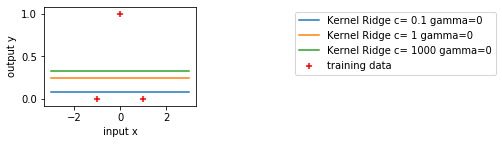

Parameter values when Kernel Ridge c= 0.1 gamma=1
[-0.00304207  0.09111257 -0.00304207]
Parameter values when Kernel Ridge c= 1 gamma=1
[-0.09768542  0.53593646 -0.09768542]
Parameter values when Kernel Ridge c= 1000 gamma=1
[-0.49072551  1.35969596 -0.49072551]


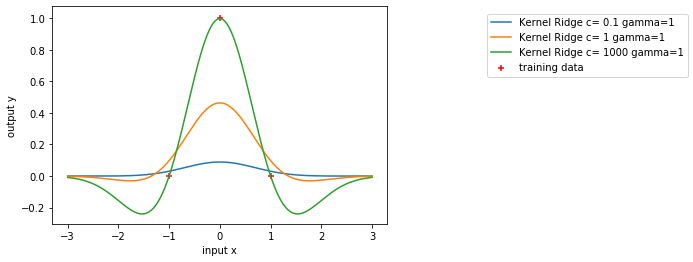

Parameter values when Kernel Ridge c= 0.1 gamma=5
[-5.56855542e-05  9.09091591e-02 -5.56855542e-05]
Parameter values when Kernel Ridge c= 1 gamma=5
[-0.00168452  0.50001135 -0.00168452]
Parameter values when Kernel Ridge c= 1000 gamma=5
[-0.0067251   0.99909154 -0.0067251 ]


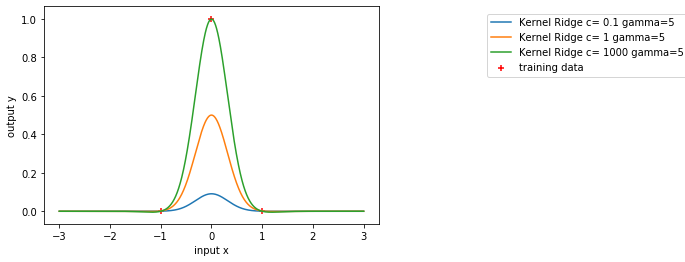

Parameter values when Kernel Ridge c= 0.1 gamma=10
[-3.75206031e-07  9.09090909e-02 -3.75206031e-07]
Parameter values when Kernel Ridge c= 1 gamma=10
[-1.13499825e-05  5.00000001e-01 -1.13499825e-05]
Parameter values when Kernel Ridge c= 1000 gamma=10
[-4.53092661e-05  9.99001003e-01 -4.53092661e-05]


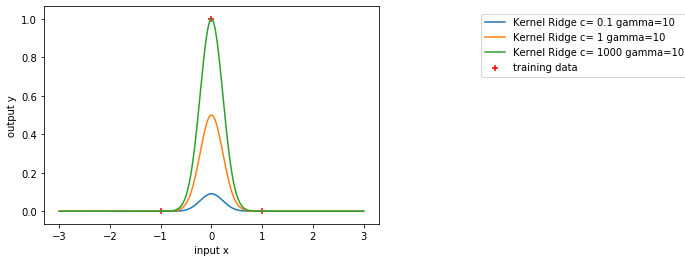

Parameter values when Kernel Ridge c= 0.1 gamma=25
[-1.14776396e-13  9.09090909e-02 -1.14776396e-13]
Parameter values when Kernel Ridge c= 1 gamma=25
[-3.47198597e-12  5.00000000e-01 -3.47198597e-12]
Parameter values when Kernel Ridge c= 1000 gamma=25
[-1.38602096e-11  9.99000999e-01 -1.38602096e-11]


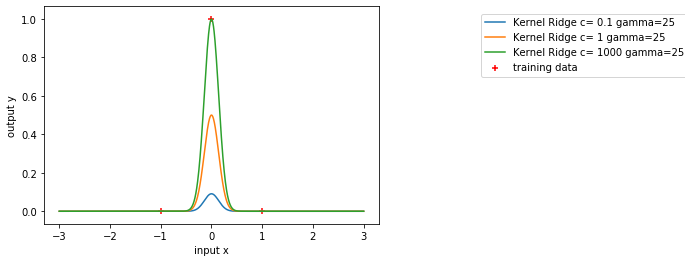

In [8]:
from sklearn.kernel_ridge import KernelRidge

fig = plt.figure()
ax = fig.add_subplot(221) 

# iterate over gamma values and train different models
gammas = [0,1,5,10,25]
for gamma in gammas:
    c_values = [0.1,1,1000]
    plt.scatter(X_train, y_train, color="red", marker="+", label="training data")
    for c in c_values:
        model_i = KernelRidge(alpha=1.0/c, kernel="rbf", gamma=gamma).fit(X_train, y_train)
        y_pred_i = model_i.predict(X_test)
        label = "Kernel Ridge c= " + str(c) + " gamma=" + str(gamma)
        plt.plot(X_test, y_pred_i,label=label)
        plt.xlabel("input x"); plt.ylabel("output y")
        print("Parameter values when " + label)
        print(model_i.dual_coef_)
    
    # Get the bounding box of the original legend
    legend = plt.legend( loc = 'upper right')
    bb = legend.get_bbox_to_anchor().inverse_transformed(ax.transAxes)

    # Change to location of the legend. 
    xOffset = 2
    bb.x0 += xOffset
    bb.x1 += xOffset
    legend.set_bbox_to_anchor(bb, transform = ax.transAxes)
    plt.title("Kernel Ridge gamma="+str(gamma))
    plt.show()